In [1]:
import pandas as pd
import numpy as np

In [3]:
file_path = 'kddcup.data_10_percent_corrected'
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
                "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", 
                "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", 
                "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
                "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
                "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Read the data
kdd_data = pd.read_csv(file_path, names=column_names)

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
label_encoder = LabelEncoder()
kdd_data['label'] = label_encoder.fit_transform(kdd_data['label'])

# One-hot encode categorical columns
kdd_data = pd.get_dummies(kdd_data, columns=["protocol_type", "service", "flag"])

# Separate features and labels
X = kdd_data.drop('label', axis=1).values
y = kdd_data['label'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y = to_categorical(y)

In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
# Build the DNN model
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer

model1.add(Dense(32, activation='relu'))  # Hidden layer

model1.add(Dense(16, activation='relu'))  # Hidden layer

model1.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
# Train the DNN model
model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9714 - loss: 0.1340 - val_accuracy: 0.9987 - val_loss: 0.0080
Epoch 2/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9988 - loss: 0.0056 - val_accuracy: 0.9990 - val_loss: 0.0061
Epoch 3/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 4/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 5/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 6/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 7/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9992 - val_loss: 0.0060
Epoch 8/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0

In [104]:
# Predict using DNN model
y_pred_dnn = np.argmax(model1.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [105]:
# Calculate F1 score for DNN
from sklearn.metrics import f1_score
f1_dnn = f1_score(y_true, y_pred_dnn, average='macro')
print(f'DNN F1 Score: {f1_dnn:.4f}')

DNN F1 Score: 0.6737


In [108]:
from tensorflow.keras.layers import LSTM, Dropout

# Reshape data for RNN (samples, timesteps, features)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
# Build the RNN model
model2 = Sequential()
model2.add(LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model2.add(Dropout(0.5))  # Regularization
model2.add(LSTM(32, return_sequences=False))
model2.add(Dense(16, activation='relu'))  # Fully connected layer
model2.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Train the RNN model
model2.fit(X_train_rnn, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 2/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 3/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 4/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 5/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 6/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 7/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 8/20
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9993 - loss: 0

In [110]:
# Predict using RNN model
y_pred_rnn = np.argmax(model2.predict(X_test_rnn), axis=1)

# Calculate F1 score for RNN
f1_rnn = f1_score(y_true, y_pred_rnn, average='macro')
print(f'RNN F1 Score: {f1_rnn:.4f}')

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
RNN F1 Score: 0.7550


In [112]:
# Get probability predictions from both models
y_pred_dnn_probs = model1.predict(X_test)
y_pred_rnn_probs = model2.predict(X_test_rnn)

# Average the predictions to create an ensemble
ensemble_preds_probs = (y_pred_dnn_probs + y_pred_rnn_probs) / 2

# Get the final predictions from the ensemble
ensemble_preds = np.argmax(ensemble_preds_probs, axis=1)

# Calculate F1 score for the ensemble model
f1_ensemble = f1_score(y_true, ensemble_preds, average='macro')
print(f'Ensemble F1 Score: {f1_ensemble:.4f}')


3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Ensemble F1 Score: 0.7222


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [116]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()


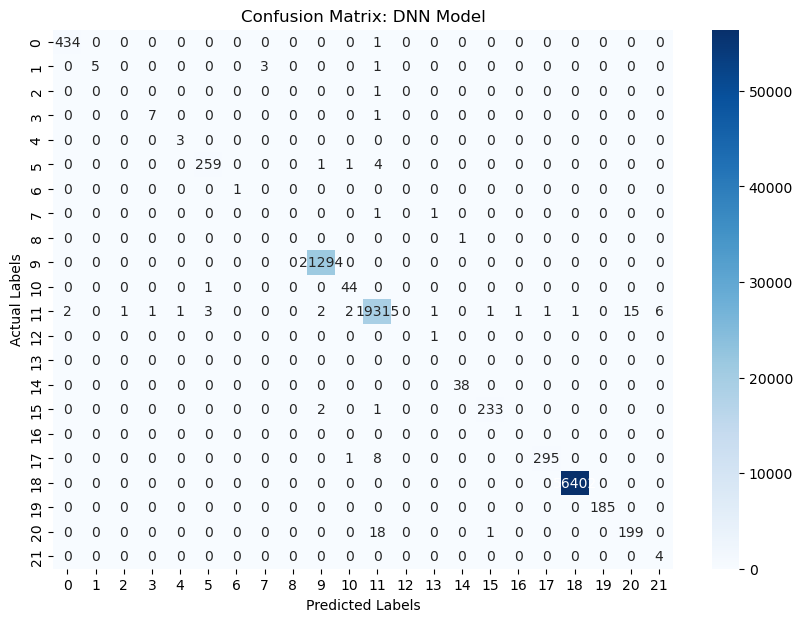

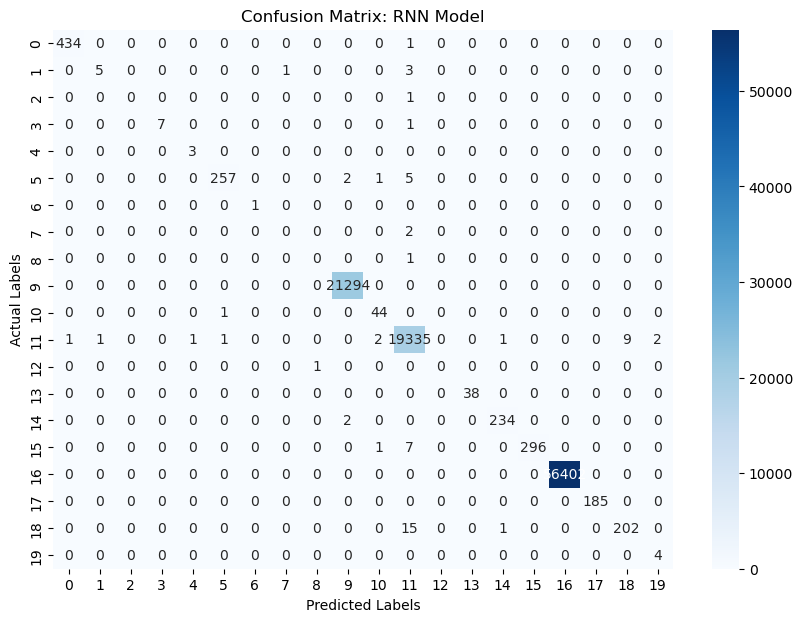

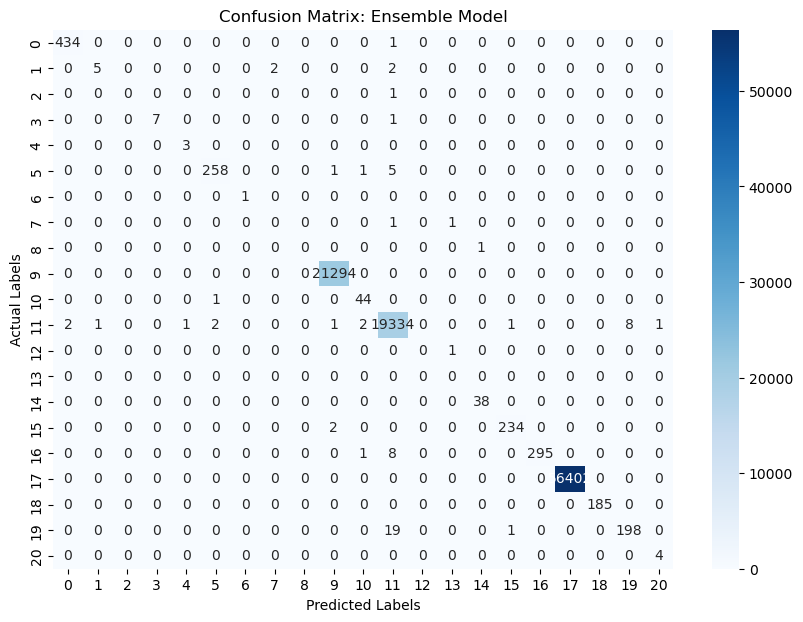

In [118]:
# Plot confusion matrices for DNN, RNN, and Ensemble
plot_confusion_matrix(y_true, y_pred_dnn, "DNN Model")
plot_confusion_matrix(y_true, y_pred_rnn, "RNN Model")
plot_confusion_matrix(y_true, ensemble_preds, "Ensemble Model")

In [120]:
# Plot accuracy and loss for DNN
history_dnn = model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

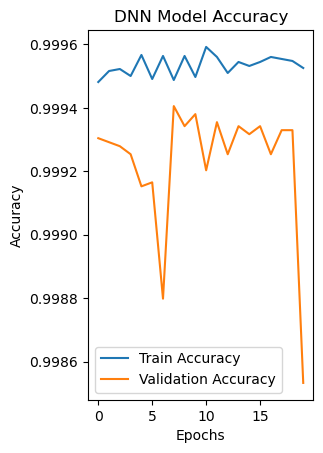

In [54]:
# DNN Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


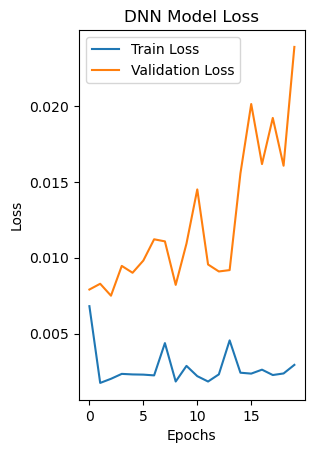

In [56]:
# DNN Loss
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [62]:
# Plot accuracy and loss for RNN
history_rnn = model2.fit(X_train_rnn, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

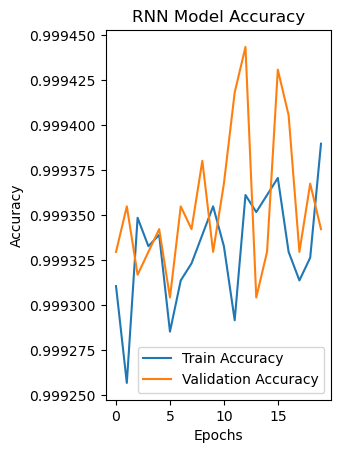

In [64]:
# RNN Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


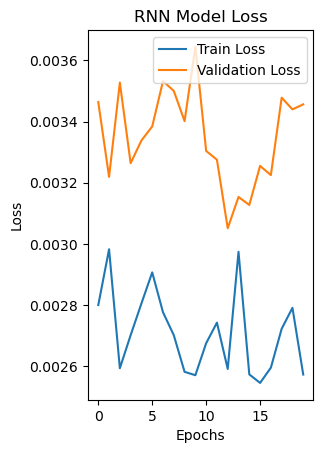

In [66]:
# RNN Loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()